# Import Neccessary Libraries

In [61]:
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

## Function to preprocess text and remove stop words


In [62]:
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    # Tokenize the text
    tokens = text.split()
    # Remove stop words, excluding "me"
    stop_words = set(stopwords.words('english'))
    stop_words.discard("me")
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the filtered tokens back into text
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Set path for txt files to read and preprocess them

In [63]:
# Set file path to the 50 files
file_paths = [f'C:/Users/User/Dropbox/PC/Desktop/dataset txt/row{i}.txt' for i in range(1, 51)]

preprocessed_texts = []

# Read and preprocess each file
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        preprocessed_text = preprocess_text(text)
        preprocessed_texts.append(preprocessed_text)

# Generate the N-grams

In [64]:
# Generate trigrams
trigrams = []
for text in preprocessed_texts:
    tokens = text.split()
    trigrams.extend(ngrams(tokens, 3))

# Count trigrams
trigram_counts = Counter(trigrams)

trigram_counts

Counter({('computron', 'me', 'com'): 19,
         ('forward', 'looking', 'statements'): 15,
         ('www', 'computron', 'me'): 15,
         ('projected', 'speculative', 'price'): 10,
         ('expect', 'projected', 'speculative'): 8,
         ('speculative', 'price', 'next'): 8,
         ('price', 'next', 'days'): 8,
         ('ali', 'duty', 'free'): 8,
         ('voice', 'internet', 'protocol'): 5,
         ('looking', 'statements', 'within'): 5,
         ('statements', 'within', 'meaning'): 5,
         ('inherent', 'conflict', 'interest'): 5,
         ('future', 'ooking', 'statements'): 5,
         ('breaking', 'news', 'vocalscape'): 4,
         ('news', 'vocalscape', 'inc'): 4,
         ('vocalscape', 'inc', 'announces'): 4,
         ('inc', 'announces', 'agreement'): 4,
         ('announces', 'agreement', 'resell'): 4,
         ('agreement', 'resell', 'mix'): 4,
         ('resell', 'mix', 'network'): 4,
         ('mix', 'network', 'services'): 4,
         ('current', 'price', 'e

# Generate graph for top 10 N-grams

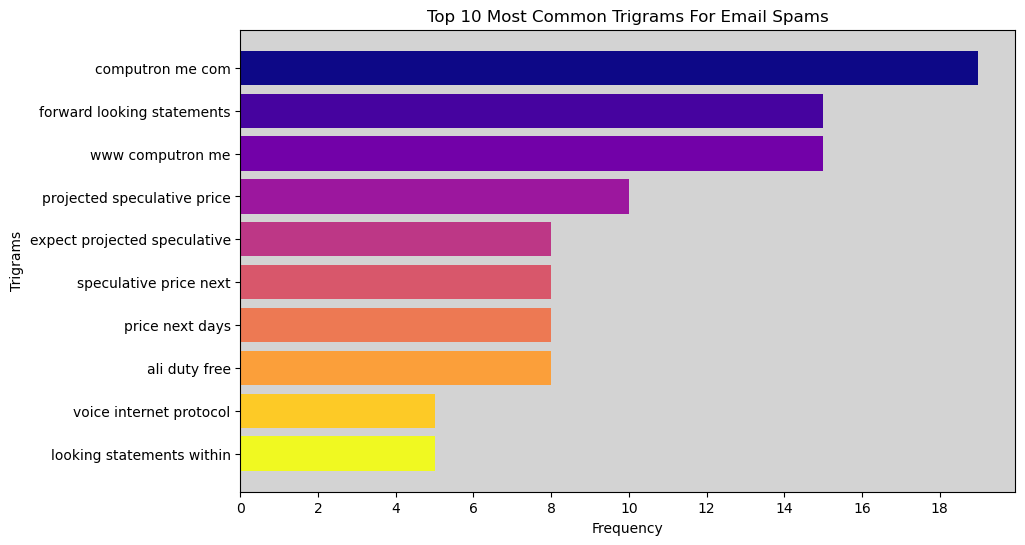

In [65]:
# Top 10 most common trigrams
most_common_trigrams = trigram_counts.most_common(10)

# Extract trigram labels and counts for the bar chart
trigram_labels, trigram_counts = zip(*most_common_trigrams)

# Convert each trigram tuple into a string
trigram_labels = [' '.join(trigram) for trigram in trigram_labels]

# Generate a list of colors from a colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(trigram_labels)))

plt.figure(figsize=(10, 6))

# Create a horizontal bar chart with different colors for each bar
for i, (label, count) in enumerate(zip(trigram_labels, trigram_counts)):
    plt.barh(label, count, color=colors[i])

plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title(f'Top 10 Most Common Trigrams For Email Spams')

# Set the background color
plt.gca().set_facecolor('lightgrey')

# Invert the y-axis to display the most common trigrams at the top
plt.gca().invert_yaxis()

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()